In [3]:
pwd

'C:\\Users\\Tbbsp\\TinaDataClass\\Project1'

In [4]:
# Doing imports
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

In [5]:
# set the filepath and load in a shapefile


fp = "data/World_Countries.shp"

#fp = "Cartogram_Example/London_Borough_Excluding_MHW.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

map_df.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


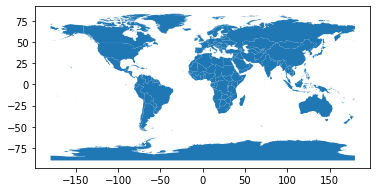

In [7]:
map_df.plot()

In [8]:
#read london data csv file

data_for_map = "data/2016 World Happiness Report.csv"

data_for_map = pd.read_csv(data_for_map)

data_for_map.head()

,COUNTRY,Region,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,Afghanistan,SouthernAsia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,CentralandEasternEurope,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,MiddleEastandNorthernAfrica,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Sub-SaharanAfrica,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,LatinAmericaandCaribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985


In [9]:
# join the geodataframe with the cleaned up csv dataframe

merged = pd.merge(map_df, data_for_map)
merged.head()

#merged = map_df.set_index("COUNTRY").join(data_for_map.set_index("Country"))

#merged.head()


#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

merged.head()

,COUNTRY,geometry,Region,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",SouthernAsia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",MiddleEastandNorthernAfrica,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
2,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",CentralandEasternEurope,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350
3,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",CentralandEasternEurope,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
4,Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...",CentralandEasternEurope,121,4.360,4.266,4.454,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864


C:\Users\Tbbsp\anaconda3\envs\geopandas\lib\site-packages\geopandas\plotting.py:463: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


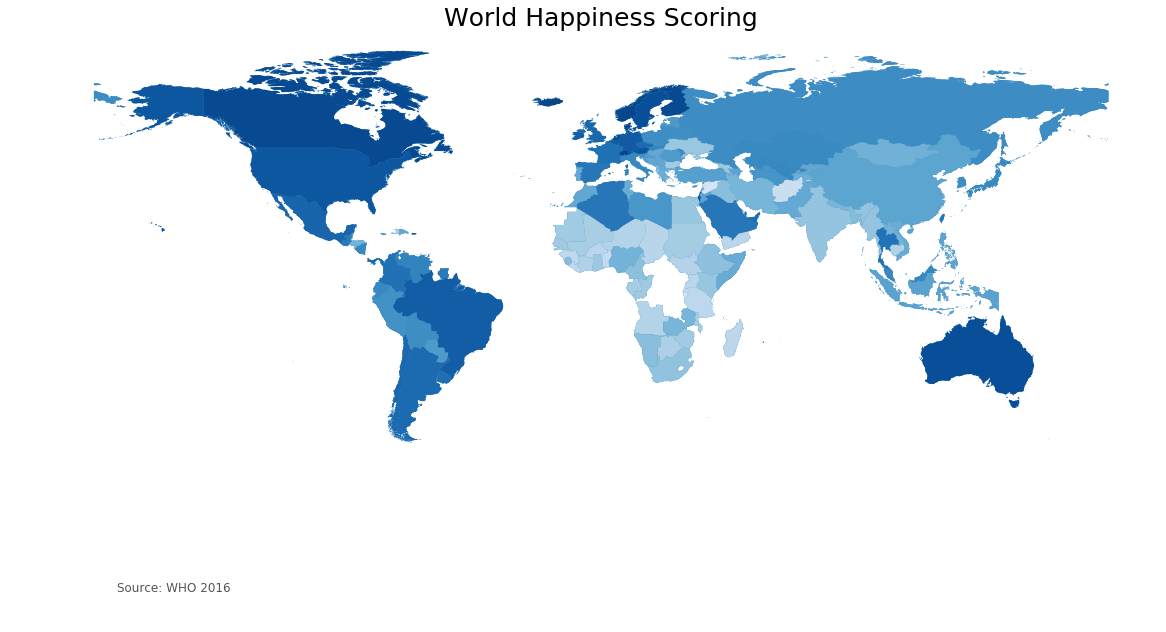

In [10]:
# create map

# set a variable that will call whatever column we want to visualise on the map

variable = "HappinessScore"

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(20, 12))
ax = merged.plot(axes=ax)
ax.set_axis_off()
# add a title
ax.set_title("World Happiness Scoring", fontdict={"fontsize": "25", "fontweight" : "3"})
# create an annotation for the data source
ax.annotate("Source: WHO 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")
# set the range for the choropleth
vmin, vmax = 2, 8
merged.plot(column=variable, cmap='Blues', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor=None)